In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
import math
import cv2 as cv

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


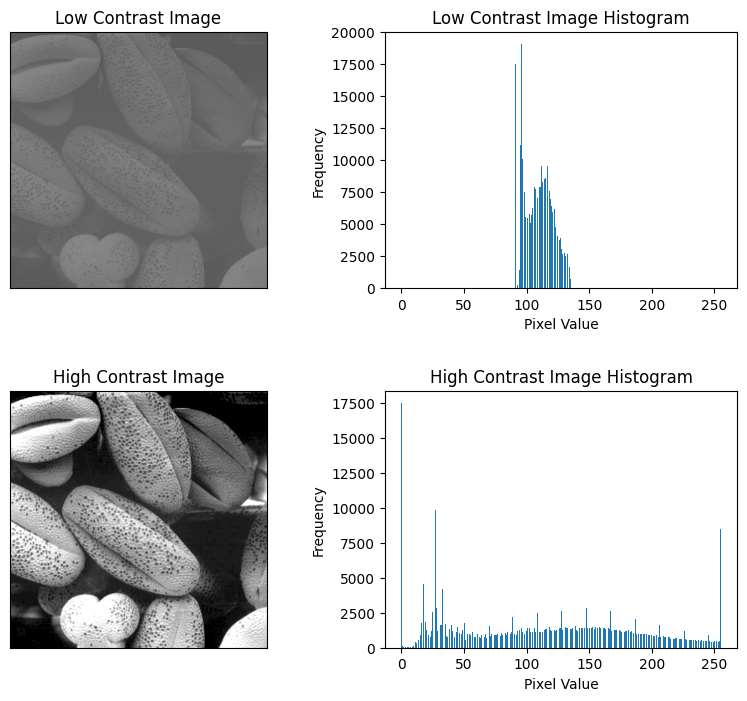

In [13]:
### IMAGES AND HISTOGRAM FIGURES ###

# Extract example low and high contrast images into numpy arrays
from google.colab import drive
drive.mount("/content/drive")
lowConArr = cv.imread("/content/drive/MyDrive/Colab Notebooks/LowContrastExample.tif", cv.IMREAD_GRAYSCALE)
highConArr = cv.imread("/content/drive/MyDrive/Colab Notebooks/HighContrastExample.tif", cv.IMREAD_GRAYSCALE)

# Get histograms of each image
lowConHist = np.zeros(256)
highConHist = np.zeros(256)
for pixel in lowConArr.flatten():
    lowConHist[pixel] += 1
for pixel in highConArr.flatten():
    highConHist[pixel] += 1

# Plot images and histograms
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(10,8))
ax[0,0].imshow(lowConArr,cmap="gray",vmin=0,vmax=255)
ax[0,1].bar(np.arange(256),lowConHist)
ax[1,0].imshow(highConArr,cmap="gray",vmin=0,vmax=255)
ax[1,1].bar(np.arange(256),highConHist)
# Set x/y axis off on images
ax[0,0].get_xaxis().set_visible(False)
ax[0,0].get_yaxis().set_visible(False)
ax[1,0].get_xaxis().set_visible(False)
ax[1,0].get_yaxis().set_visible(False)
# Set titles
ax[0,0].set_title("Low Contrast Image")
ax[0,1].set_title("Low Contrast Image Histogram")
ax[1,0].set_title("High Contrast Image")
ax[1,1].set_title("High Contrast Image Histogram")
# Set x/y labels
ax[0,1].set_xlabel("Pixel Value")
ax[1,1].set_xlabel("Pixel Value")
ax[0,1].set_ylabel("Frequency")
ax[1,1].set_ylabel("Frequency")
#Adjust spacing
fig.subplots_adjust(hspace=0.4)


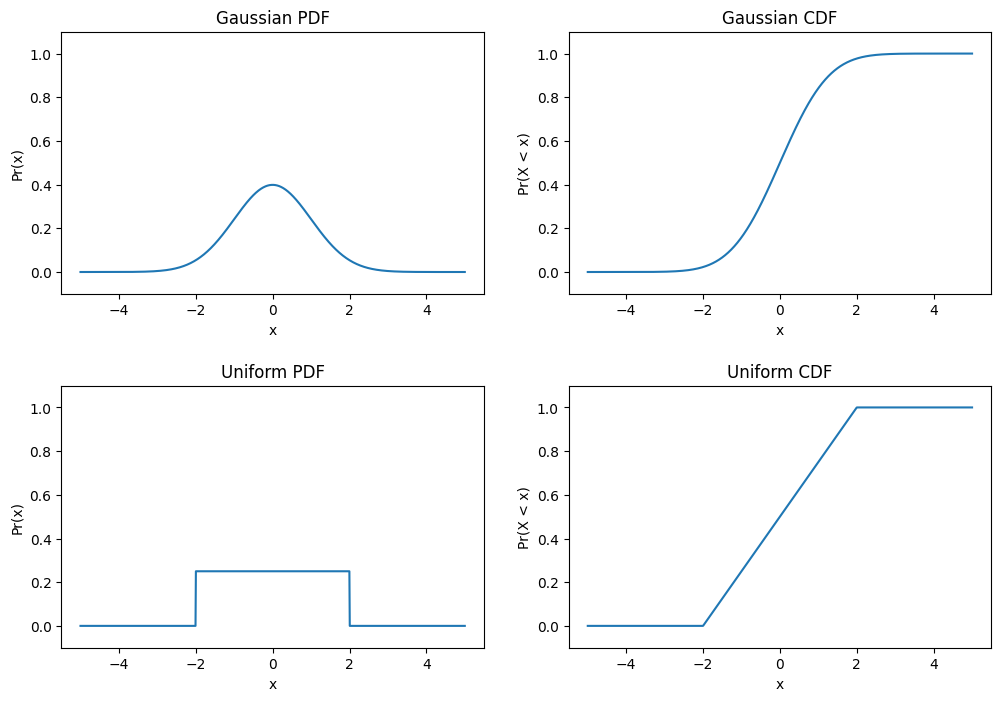

In [ ]:
### GAUSSIAN PDF AND CDF FIGURES ###

# Initial parameters
mean = 0
var = 1
std = math.sqrt(var)
a = -2
b = 2
numSamples = 1000
samples = np.linspace(-5,5,numSamples)

# Calculate gaussian pdf
gaussPDF = 1/(np.sqrt(2*np.pi*var)) * np.exp(-(((samples-mean)**2)/(2*var)))

# Calculate gaussian cdf
gaussCDF = 0.5 * (1+special.erf((samples-mean)/(std*math.sqrt(2))))

#Calculate uniform pdf
uniformPDf = np.ones(numSamples) * (1/(b-a))
uniformPDf[samples < a] = 0
uniformPDf[samples > b] = 0

# Calculate uniform cdf
uniformCDf = np.zeros(numSamples)
for i in range(numSamples):
    if samples[i] >= a and samples[i] <= b:
        uniformCDf[i] = (samples[i]-a)/(b-a)
    elif samples[i] > b:
        uniformCDf[i] = 1


# Subplot both gaussian and uniform pdf/cdf
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(12,8))
ax[0,0].plot(samples,gaussPDF)
ax[0,1].plot(samples,gaussCDF)
ax[1,0].plot(samples,uniformPDf)
ax[1,1].plot(samples,uniformCDf)
# Set the titles
ax[0,0].set_title("Gaussian PDF")
ax[0,1].set_title("Gaussian CDF")
ax[1,0].set_title("Uniform PDF")
ax[1,1].set_title("Uniform CDF")
# Set the x and y labels
plt.setp(ax, xlabel = "x")
ax[0,0].set_ylabel("Pr(x)")
ax[0,1].set_ylabel("Pr(X < x)")
ax[1,0].set_ylabel("Pr(x)")
ax[1,1].set_ylabel("Pr(X < x)")
# Set the y ticks
yTicks = np.arange(0,1.2,0.2)
plt.setp(ax, yticks = yTicks)
# Set the y limits
plt.setp(ax, ylim = (-0.1,1.1))
# Adjust spacing
fig.subplots_adjust(wspace=0.2, hspace=0.35)

